# Magics

In [1]:
%%bigquery -i
SELECT title, `by` AS author, DATETIME(`timestamp`) AS posted_at, score
FROM bigquery-public-data.hacker_news.full
WHERE type = 'story'
ORDER BY timestamp NULLS LAST
LIMIT 3

Query is running:   0%|          |

Downloading:   0%|          |

HTML(value='<b>Query Details</b><br>Data processed: <b>none (returned from cache)</b><br>Total time: <b>840 ms…

,title,author,posted_at,score
0,A Student's Guide to Startups,phyllis,2006-10-09 18:30:28,16
1,Woz Interview: the early days of Apple,phyllis,2006-10-09 18:40:33,7
2,NYC Developer Dilemma,onebeerdave,2006-10-09 18:47:42,5


# Plotting

In [2]:
%%bigquery scores
SELECT score, COUNT(*) AS frequency, EXTRACT(YEAR FROM `timestamp`) as `year`
FROM bigquery-public-data.hacker_news.full
WHERE type = 'story' AND score IS NOT NULL
      AND `timestamp` >= TIMESTAMP '2007-01-01' AND `timestamp` < TIMESTAMP '2015-01-01'
GROUP BY score, `year`

In [3]:
from mindlab import Figure

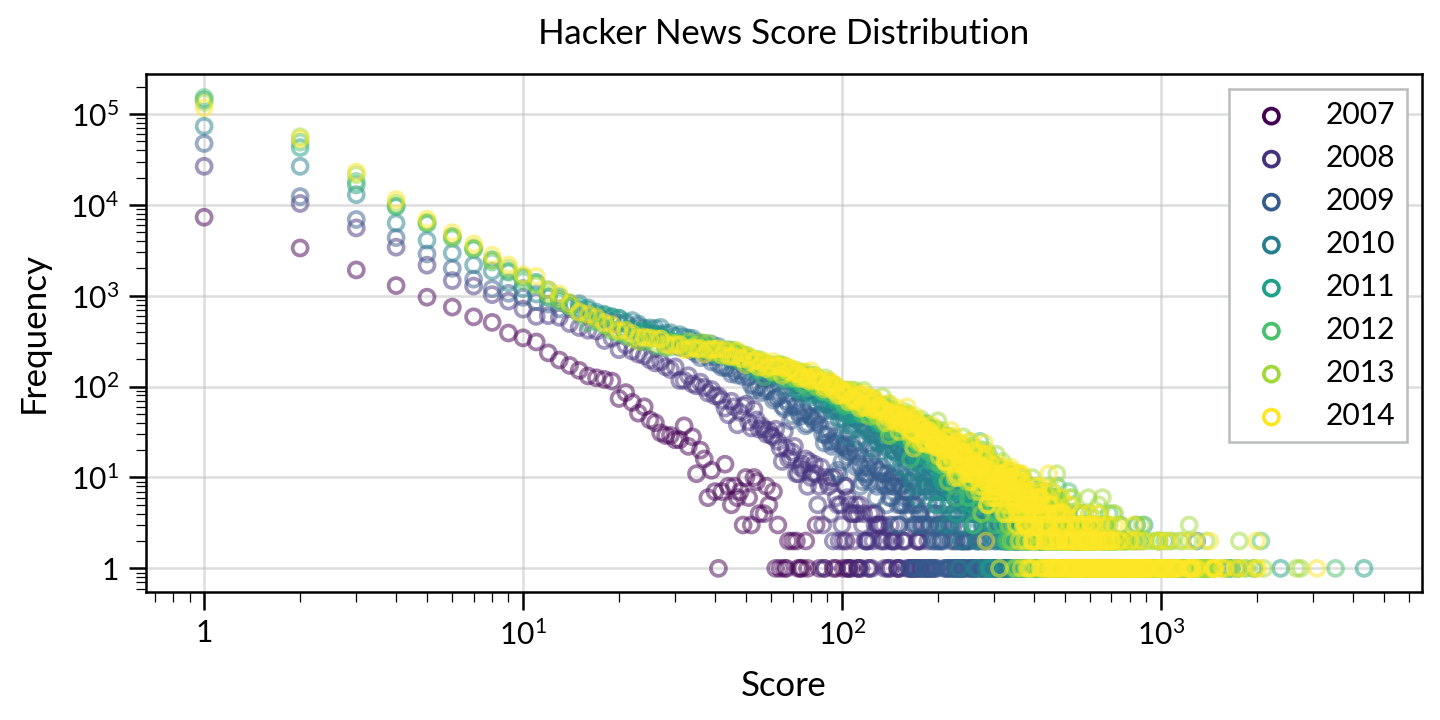

In [4]:
figure = Figure(
    title='Hacker News Score Distribution',
    xlabel='Score', ylabel='Frequency', xscale='log', yscale='log',
)
figure.scatter(scores.groupby('year'), cmap='viridis', alpha=0.5)